<a href="https://colab.research.google.com/github/2303A52455/aiml_2303A52455/blob/main/AIML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_excel('/content/Classified_data.xlsx')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.620730,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.463812,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5 non-null      int64  
 1   WTT           5 non-null      float64
 2   PTI           5 non-null      float64
 3   EQW           5 non-null      float64
 4   SBI           5 non-null      float64
 5   LQE           5 non-null      float64
 6   QWG           5 non-null      float64
 7   FDJ           5 non-null      float64
 8   PJF           5 non-null      float64
 9   HQE           5 non-null      float64
 10  NXJ           5 non-null      float64
 11  TARGET CLASS  5 non-null      int64  
dtypes: float64(10), int64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.000000,0.956921,1.232484,0.661121,0.786261,1.121328,0.660139,1.117337,0.967704,1.089071,1.325323,0.600000
std,1.581139,0.292191,0.277379,0.153105,0.075186,0.288053,0.191383,0.408611,0.322080,0.389935,0.147696,0.547723
min,0.000000,0.635632,0.949750,0.535342,0.668976,0.780862,0.352608,0.675334,0.643798,0.621552,1.153093,0.000000
25%,1.000000,0.721360,1.003722,0.567946,0.755464,0.924109,0.648450,0.759697,0.646691,0.879422,1.231409,0.000000
50%,2.000000,0.913917,1.201493,0.627280,0.825624,1.142504,0.703727,1.115596,1.013546,0.957877,1.285597,1.000000
75%,3.000000,1.234204,1.386726,0.653046,0.825645,1.232537,0.720781,1.409708,1.154483,1.463812,1.463812,1.000000
max,4.000000,1.279491,1.620730,0.921990,0.855595,1.526629,0.875128,1.626351,1.380003,1.522692,1.492702,1.000000


In [6]:
l=list(df.columns)
l[0:len(l)-2]

['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE']

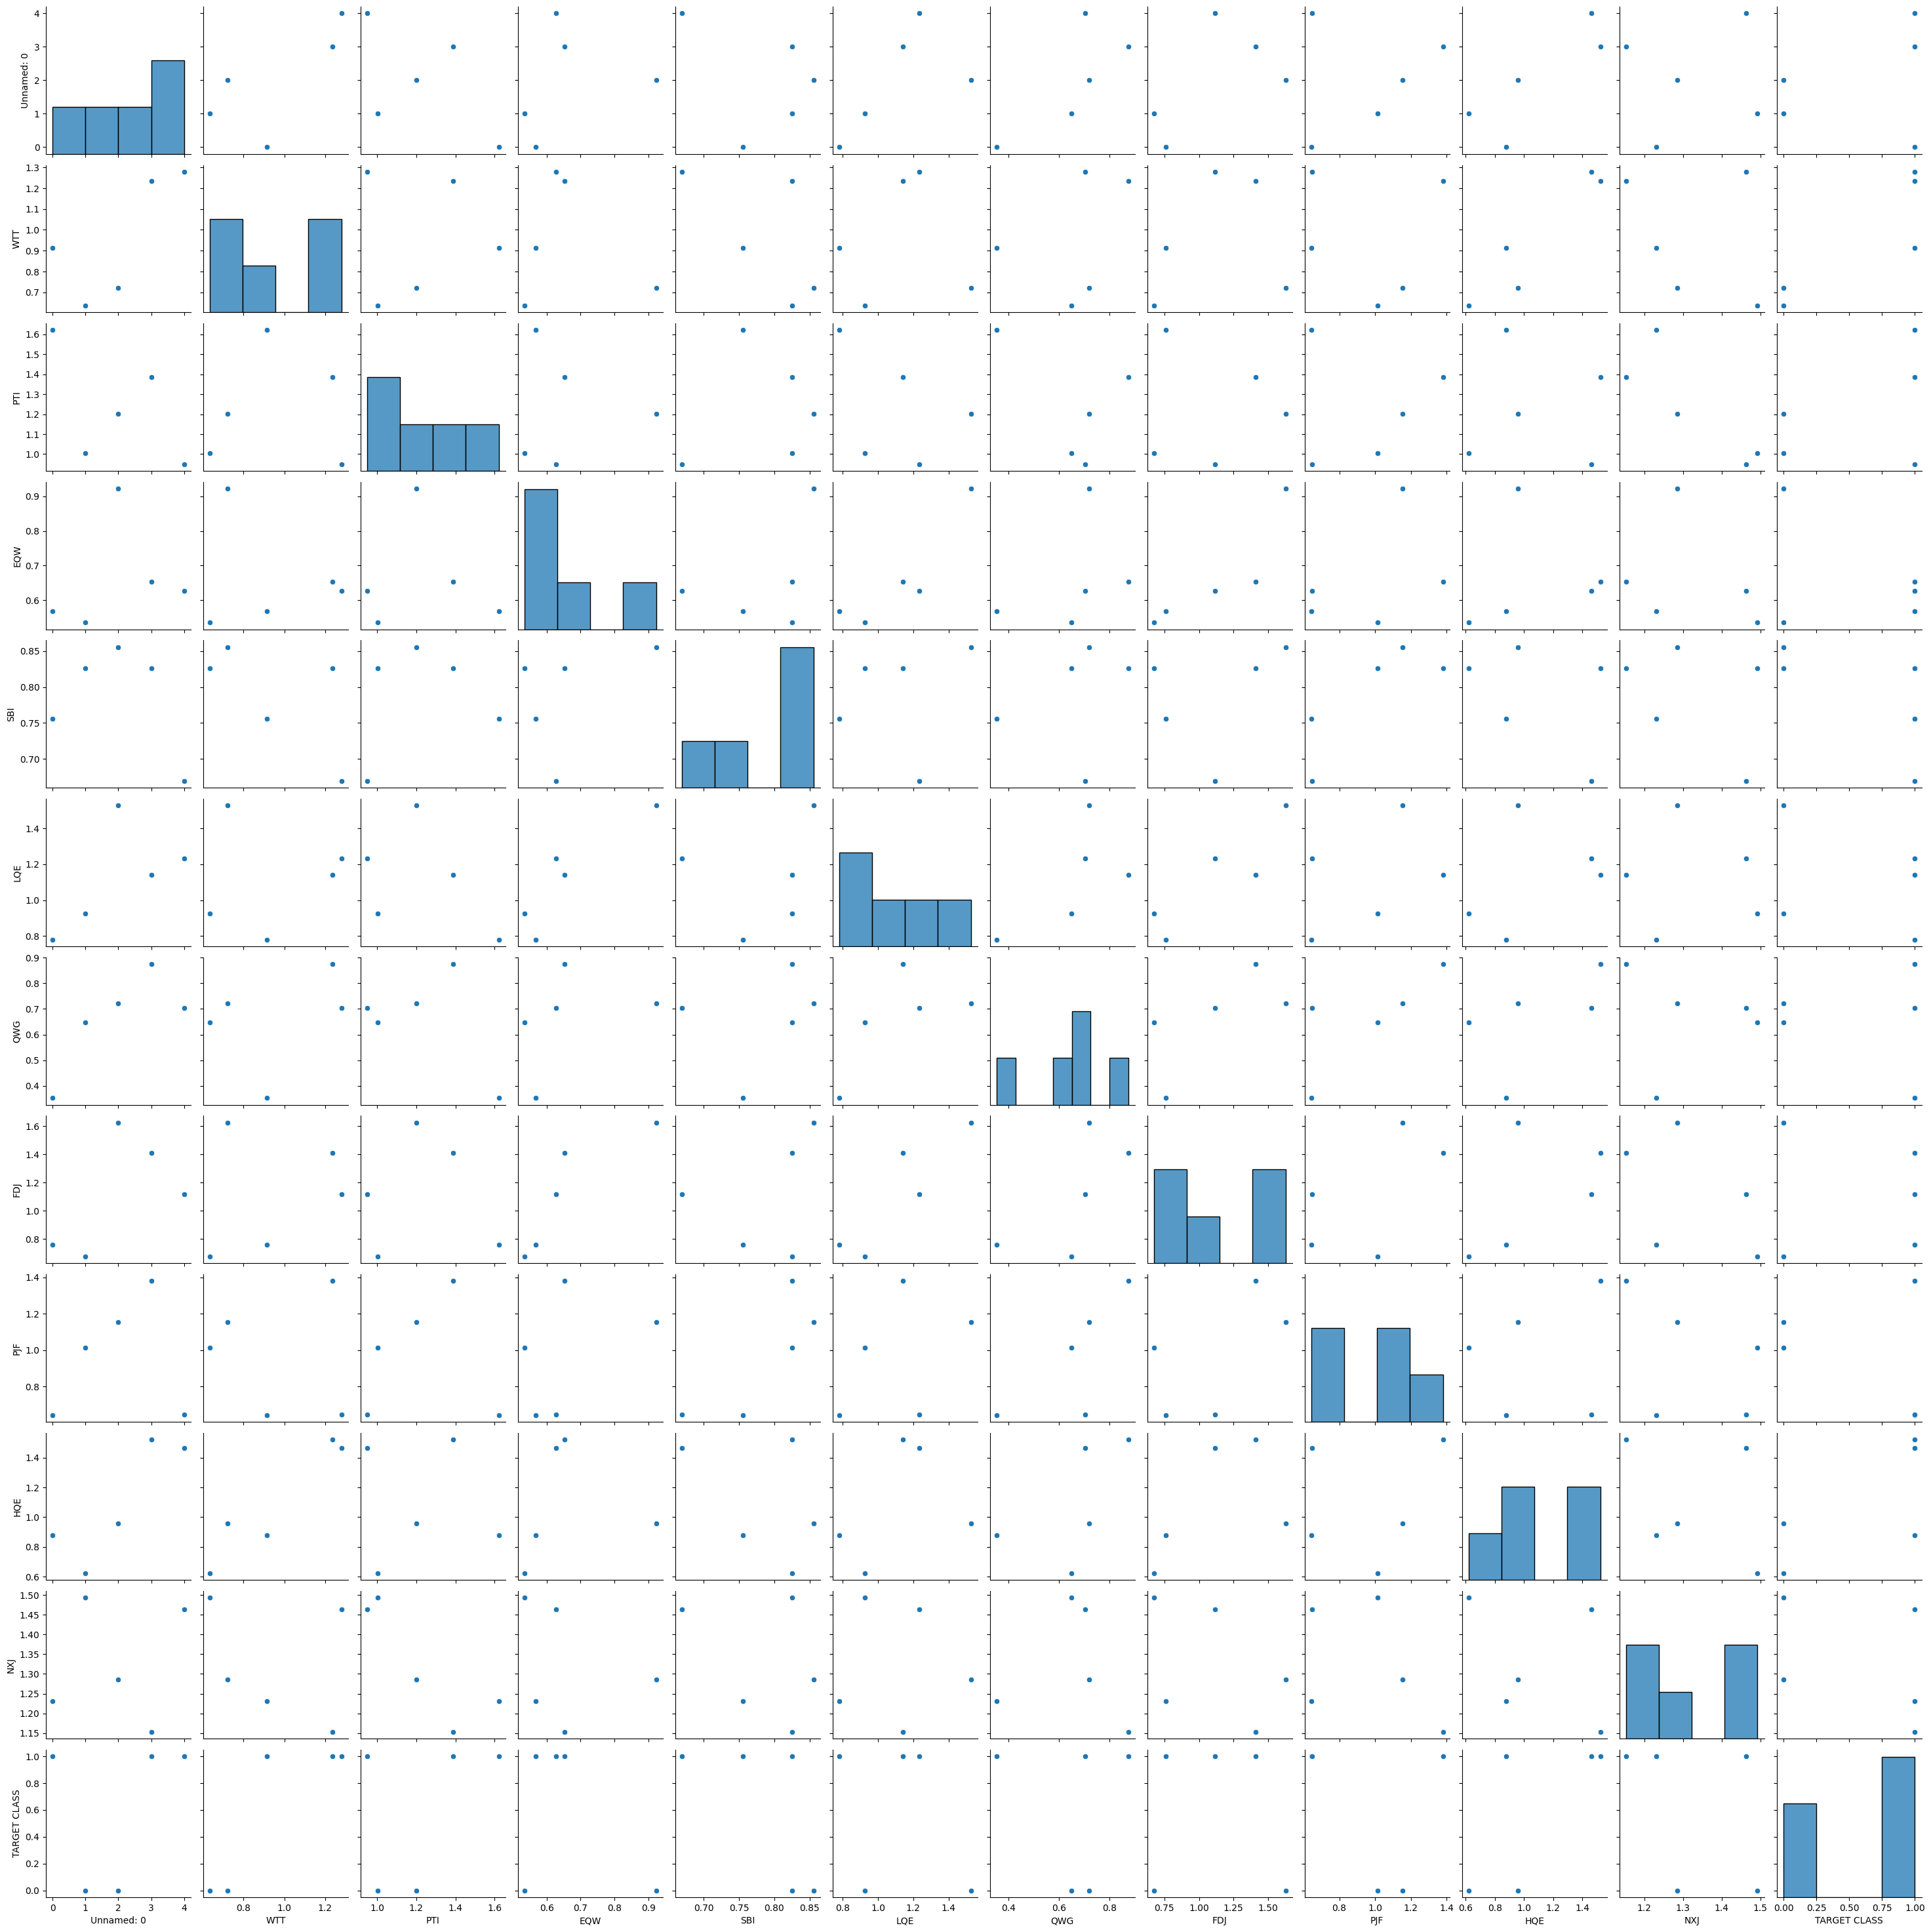

In [7]:
sns.pairplot(df)

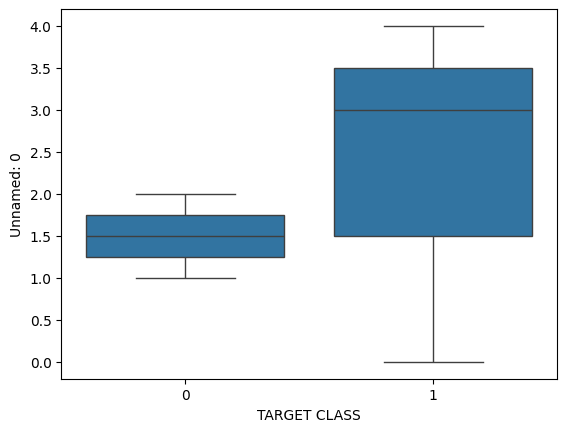

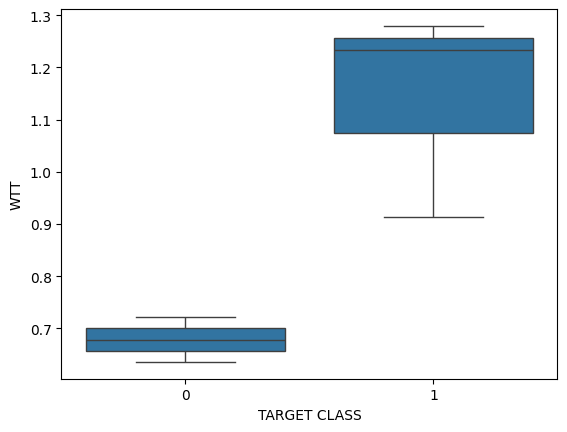

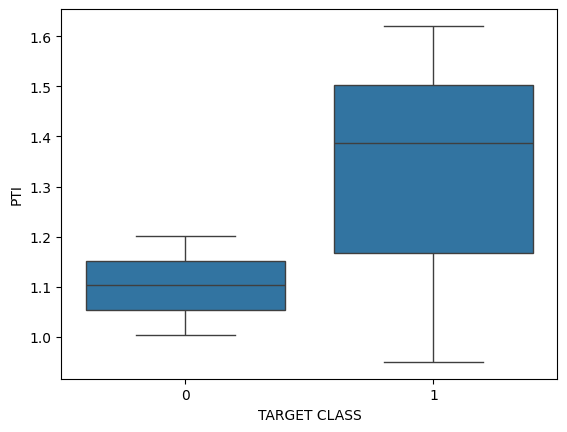

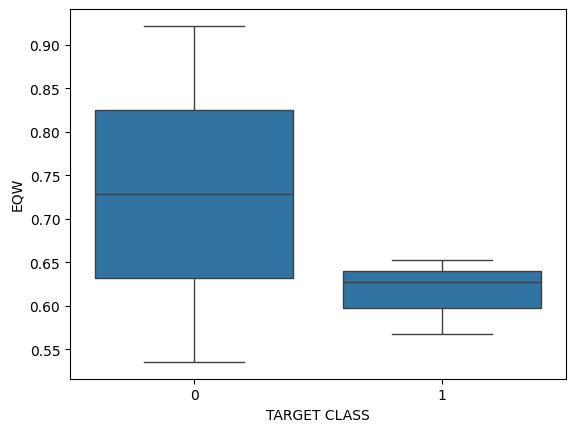

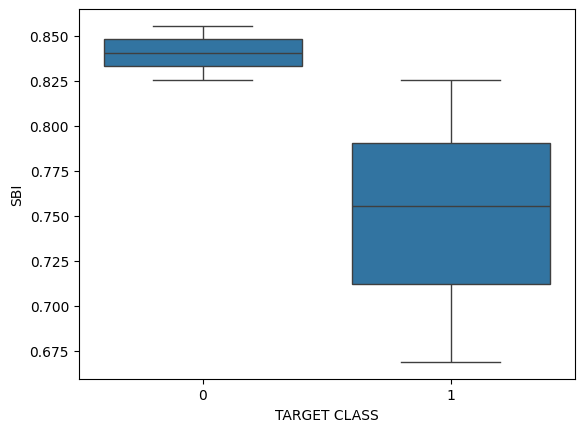

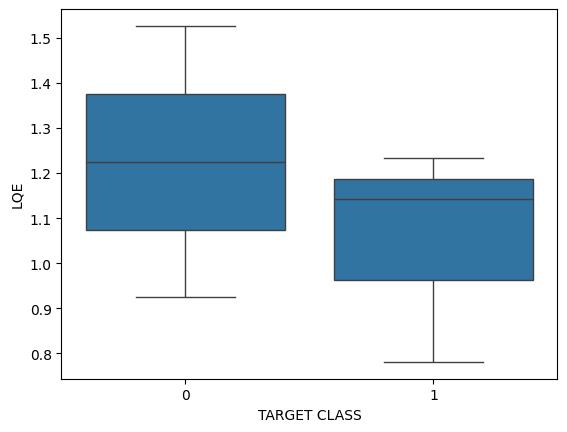

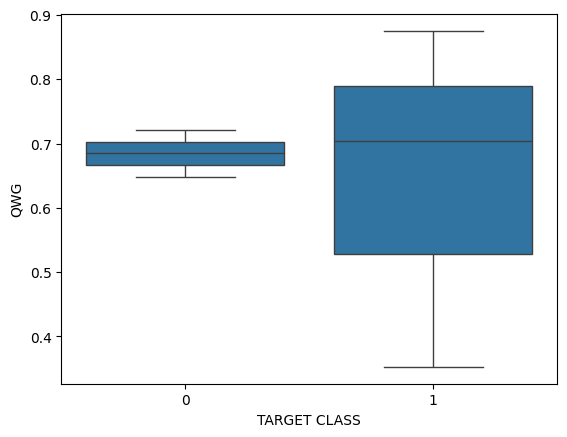

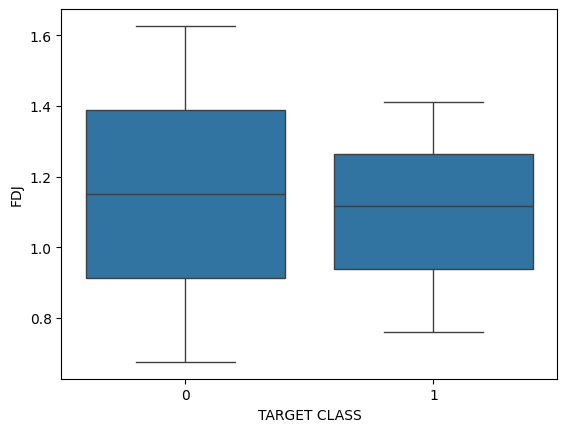

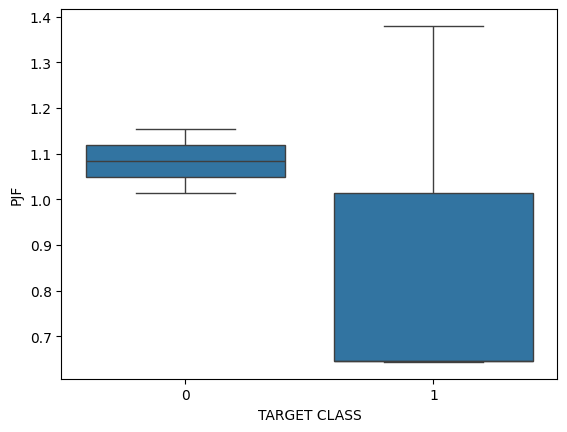

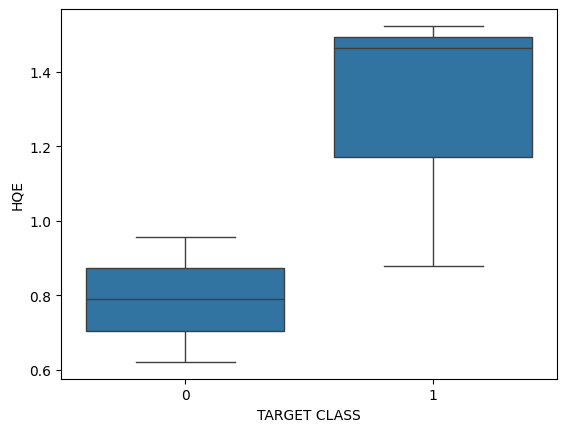

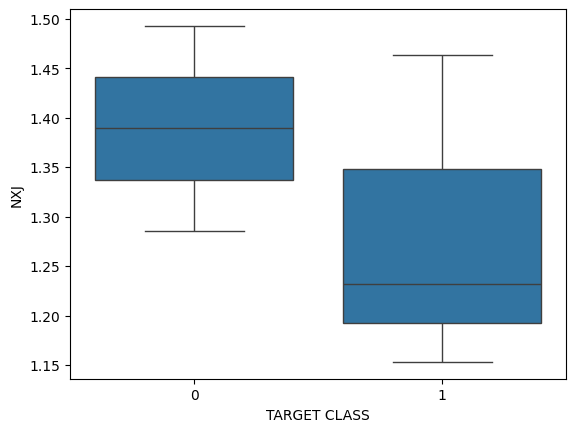

<Figure size 640x480 with 0 Axes>

In [8]:
for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.414214,-0.164549,1.564905,-0.680398,-0.457953,-1.321470,-1.796555,-0.978568,-1.124372,-0.601113,-0.710912
1,-0.707107,-1.229373,-0.922074,-0.918485,0.585650,-0.765477,-0.068284,-1.209401,0.159130,-1.340486,1.267036
2,0.000000,-0.901345,-0.124916,1.904967,1.031011,1.573116,0.354264,1.392754,0.648363,-0.376164,-0.300717
3,0.707107,1.060991,0.621704,-0.058965,0.585337,0.082191,1.255939,0.799979,1.431209,1.243293,-1.303752
4,1.414214,1.234277,-1.139619,-0.247119,-1.744044,0.431641,0.254637,-0.004764,-1.114330,1.074470,1.048344


In [13]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[0 0]
 [1 1]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.5


In [30]:
error_rate = []

# Will take some time
# Change the range to be less than or equal to the number of samples in your training data
for i in range(1, min(60, X_train.shape[0] + 1)): # Ensure i is within the bounds of training data

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

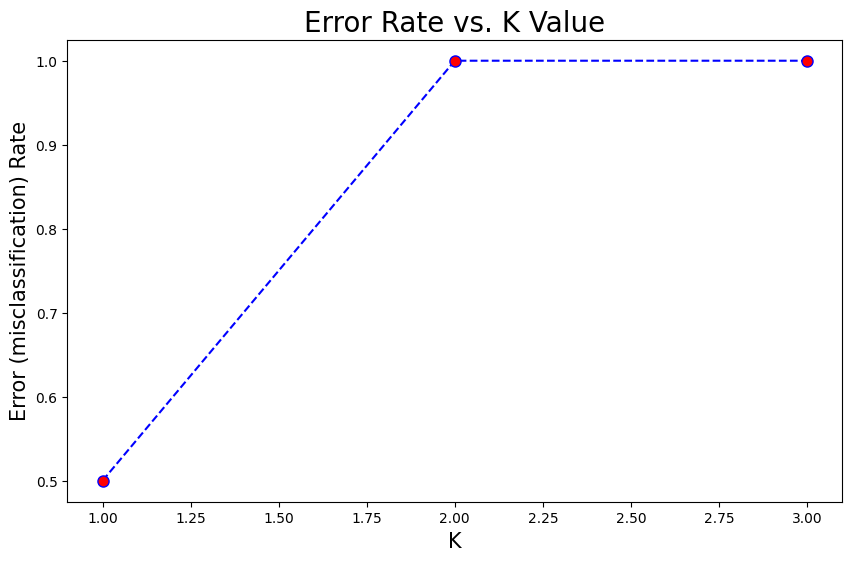

In [32]:
plt.figure(figsize=(10,6))
# Adjust the x-axis range to match the actual number of K values tested
plt.plot(range(1,len(error_rate)+1),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)